# Check my SCM run

* The below notebook allows to compare a single column model simulation against a set of benchmark simulations (shown in gray).
* All requested 1D and 2D variables are here read and plotted. "load_sims" reports variable that are missing. Lines will not show, if a variable is missing or if it contains missing values.
* In case you find inconsistencies in the benchmark set or wish to expand the code, please contact Ann Fridlind (ann.fridlind@nasa.gov), Timothy Juliano (tjuliano@ucar.edu), and Florian Tornow (ft2544@columbia.edu).

In [101]:
%run functions_plotting.py

## select (grayed out) simulations to plot
sim_keyword_gray = 'dharma/sandbox/DHARMA_Lx25_dx200_FixN.'

## select LES run(s) of interest
sim_keyword_col_les = 'WRF_Lx25_dx100_FixN.'
#sim_keyword_col_scm = 'ModelE3-Phys_FixN_def_z0.'
sim_keyword_col_scm = 'icon-scm/sandbox/ICON-SCM_FixN_def_z0.'

In [102]:
vars_mean_list = pd.read_excel('https://docs.google.com/spreadsheets/d/1Vl8jYGviet7EtXZuQiitrx4NSkV1x27aJAhxxjBb9zI/export?gid=1026157027&format=xlsx',
                              sheet_name='SCM')

## short names
var_vec_1d = np.asarray(vars_mean_list.variable_id[vars_mean_list.dimensions == 'time'])
var_vec_2d = np.asarray(vars_mean_list.variable_id[vars_mean_list.dimensions == 'time, layer'])

var_vec_2d = var_vec_2d[var_vec_2d!='zf']

## long names
var_vec_1d_long = np.asarray(vars_mean_list.standard_name[vars_mean_list.dimensions == 'time'])

## Units
var_vec_1d_units = np.asarray(vars_mean_list.units[vars_mean_list.dimensions == 'time'])
var_vec_2d_units = np.asarray(vars_mean_list.units[vars_mean_list.dimensions == 'time, layer'])

In [103]:
var_vec_2d

array(['pa', 'pe', 'ua', 'va', 'rhoa', 'ta', 'qv', 'hur', 'huri', 'theta',
       'qlc', 'qlr', 'qi', 'fh', 'flc', 'fc', 'prf', 'prfi', 'tke', 'eps',
       'uw', 'vw', 'w2', 'wth', 'vf_thli', 'wqv', 'vf_qt', 'cmfu', 'cmfd',
       'rld', 'rlu', 'dth_rad', 'dth_micro', 'dth_turb', 'dq_micro',
       'dq_turb', 'na1', 'na2', 'na3', 'dna_micro_warm', 'dna_micro_cold',
       'dna_turb', 'dni_het', 'dni_sip', 'dni_hom', 'qlcs', 'qlrs',
       'qics', 'qips', 'qlcc', 'qlrc', 'qicc', 'qipc', 'nlcs', 'nlrs',
       'nics', 'nips', 'relcc', 'relrc', 'reicc', 'reipc', 'flcs', 'flrs',
       'fics', 'fips', 'flcc', 'flrc', 'ficc', 'fipc', 'vmlcs', 'vmlrs',
       'vmics', 'vmips', 'vmlcc', 'vmlrc', 'vmicc', 'vmipc'], dtype=object)

In [104]:
## load all simulations located in subfolders of the given directory
df_gray_1d,df_gray_2d = load_sims('../../output_les/',var_vec_1d,var_vec_2d,t_shift=-2,keyword=sim_keyword_gray,make_gray = 1)

## example using LES
df_col_1d_les,df_col_2d_les = load_sims('../../output_les/',var_vec_1d,var_vec_2d,t_shift=-2,keyword=sim_keyword_col_les)

## example using SCM
df_col_1d_scm,df_col_2d_scm = load_sims('../../output_scm/',var_vec_1d,var_vec_2d,t_shift=-2,keyword=sim_keyword_col_scm)

Loading variables: f(time)
../../output_les/dharma/sandbox/DHARMA_Lx25_dx200_FixN.nc
pblh not found in ../../output_les/dharma/sandbox/DHARMA_Lx25_dx200_FixN.nc
zi not found in ../../output_les/dharma/sandbox/DHARMA_Lx25_dx200_FixN.nc
cf not found in ../../output_les/dharma/sandbox/DHARMA_Lx25_dx200_FixN.nc
cflc not found in ../../output_les/dharma/sandbox/DHARMA_Lx25_dx200_FixN.nc
cfc not found in ../../output_les/dharma/sandbox/DHARMA_Lx25_dx200_FixN.nc
ssaf not found in ../../output_les/dharma/sandbox/DHARMA_Lx25_dx200_FixN.nc
Loading variables: f(time,height)
../../output_les/dharma/sandbox/DHARMA_Lx25_dx200_FixN.nc
pe not found in ../../output_les/dharma/sandbox/DHARMA_Lx25_dx200_FixN.nc
qi not found in ../../output_les/dharma/sandbox/DHARMA_Lx25_dx200_FixN.nc
fh not found in ../../output_les/dharma/sandbox/DHARMA_Lx25_dx200_FixN.nc
fc not found in ../../output_les/dharma/sandbox/DHARMA_Lx25_dx200_FixN.nc
tke not found in ../../output_les/dharma/sandbox/DHARMA_Lx25_dx200_FixN.nc
c

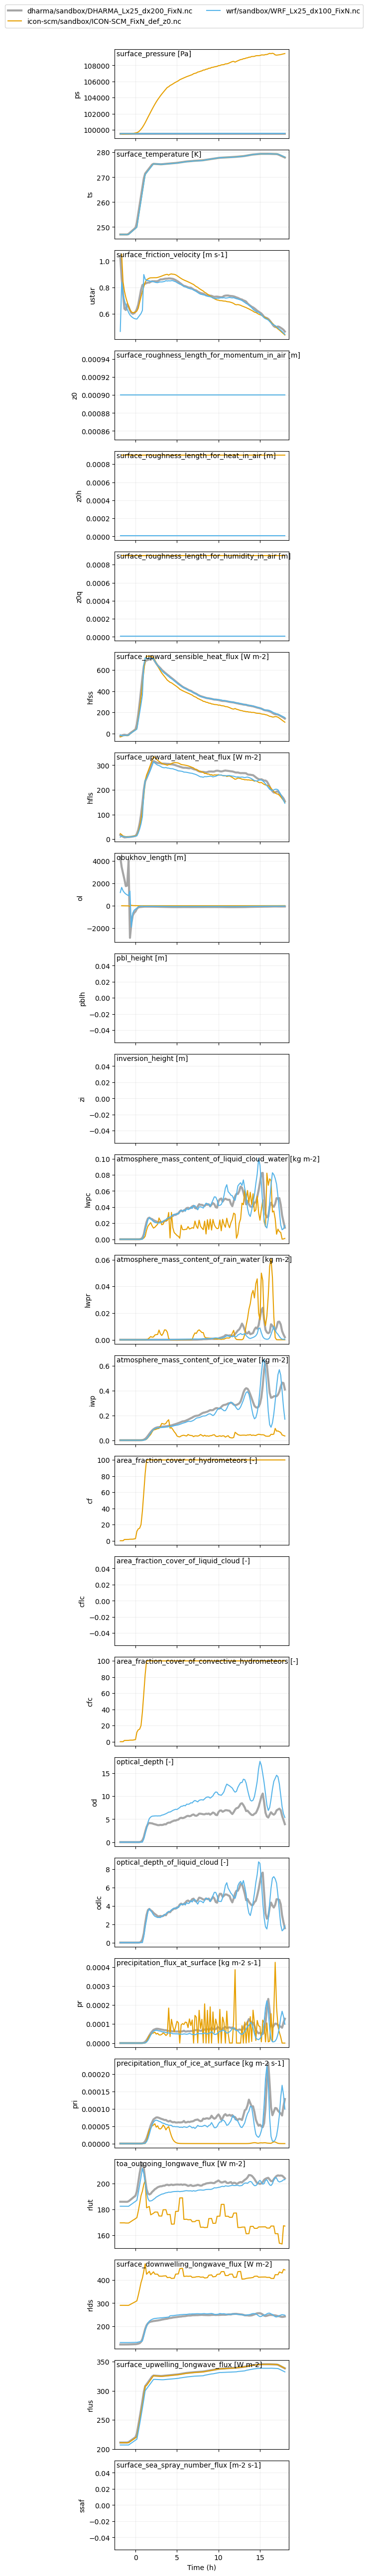

In [105]:
# plot variables that have only time dependence
plot_1d(pd.concat([df_gray_1d,df_col_1d_scm,df_col_1d_les]),var_vec_1d,longnames=var_vec_1d_long,units=var_vec_1d_units)

In [106]:
#df_gray_2d.describe
#df_col_2d_scm
var_vec_2d

array(['pa', 'pe', 'ua', 'va', 'rhoa', 'ta', 'qv', 'hur', 'huri', 'theta',
       'qlc', 'qlr', 'qi', 'fh', 'flc', 'fc', 'prf', 'prfi', 'tke', 'eps',
       'uw', 'vw', 'w2', 'wth', 'vf_thli', 'wqv', 'vf_qt', 'cmfu', 'cmfd',
       'rld', 'rlu', 'dth_rad', 'dth_micro', 'dth_turb', 'dq_micro',
       'dq_turb', 'na1', 'na2', 'na3', 'dna_micro_warm', 'dna_micro_cold',
       'dna_turb', 'dni_het', 'dni_sip', 'dni_hom', 'qlcs', 'qlrs',
       'qics', 'qips', 'qlcc', 'qlrc', 'qicc', 'qipc', 'nlcs', 'nlrs',
       'nics', 'nips', 'relcc', 'relrc', 'reicc', 'reipc', 'flcs', 'flrs',
       'fics', 'fips', 'flcc', 'flrc', 'ficc', 'fipc', 'vmlcs', 'vmlrs',
       'vmics', 'vmips', 'vmlcc', 'vmlrc', 'vmicc', 'vmipc'], dtype=object)

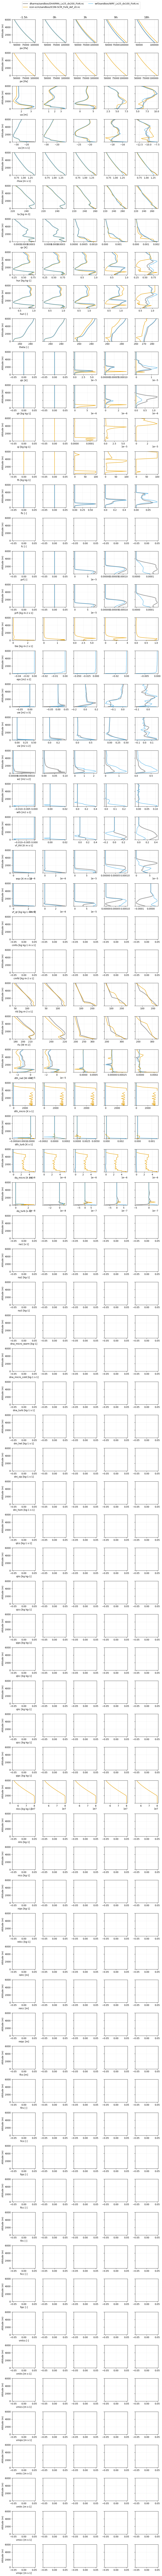

<Figure size 1000x600 with 0 Axes>

In [107]:
## example where ERA5 and radiosonde are included
plot_2d(pd.concat([df_gray_2d,df_col_2d_scm,df_col_2d_les]),var_vec = var_vec_2d,times=[-1.5,0,3,9,18],z_max=6000,units=var_vec_2d_units)## example where ERA5 and radiosonde are included